# <font color='blue'>Table of Contents</font>
<a id='top'></a>

### This report includes the following steps of the data wrangling process:


* [Gather](#gather)
* [Assess](#assess)
* [Clean](#clean)
* [Analyze & Visualize](#act)

<a id='gather'></a>
# Gather Data

In [1]:
# import libraries
import tweepy
import pandas as pd
import numpy as np
import json
import time
import requests
import re

In [2]:
# improve pandas dataframe display
pd.set_option('display.max_colwidth', None)
pd.set_option('max_rows', None)

In [3]:
# read private information from file to use the Twitter API
with open('twitter_keys.txt') as file:
    keys = json.loads(file.readline())
consumer_key = keys['consumer_key']
consumer_secret = keys['consumer_secret']
access_token = keys['access_token']
access_secret = keys['access_secret']

In [4]:
# authorize the Twitter session
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

# initialize the Twitter session with values to wait when the rate limit is reached
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [5]:
# read provided tweet data from CSV
tweets = pd.read_csv('twitter-archive-enhanced.csv')

In [6]:
# download additional TSV file from the website
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
req = requests.get(url, allow_redirects=True)
with open('image_predictions.tsv','wb') as f:
    f.write(req.content)

In [7]:
# read and store the breed_predictions of the dogs from the TSV file
breed_predictions = pd.read_csv('image_predictions.tsv',sep='\t')

In [8]:
# start a timer to keep track of progress and waits
start = time.time()
# start a list of tweets that can no longer be found
deadlinks = []

# open file to write additional tweet information
with open('tweet_json.txt','w') as json_file:
    # go through each tweet one by one
    for tweet_id in tweets.tweet_id:
        try:
            # gather more information about the provided tweets
            status = api.get_status(tweet_id, tweet_mode="extended")
            # print progress message that tweet was found
            print('Tweet ID: {} @ {:.2f} minutes'.format(tweet_id, (time.time() - start)/60))
            # write information to the open file
            json.dump(status._json, json_file)
            # start a new line for the next tweet
            json_file.write('\n')
        # if the tweet is not found
        except:
            # print update message
            print("POST NOT FOUND: {}".format(tweet_id))
            # add the tweet_id to the deadlinks list
            deadlinks.append(tweet_id)


Tweet ID: 892420643555336193 @ 0.01 minutes
Tweet ID: 892177421306343426 @ 0.01 minutes
Tweet ID: 891815181378084864 @ 0.01 minutes
Tweet ID: 891689557279858688 @ 0.02 minutes
Tweet ID: 891327558926688256 @ 0.02 minutes
Tweet ID: 891087950875897856 @ 0.02 minutes
Tweet ID: 890971913173991426 @ 0.03 minutes
Tweet ID: 890729181411237888 @ 0.03 minutes
Tweet ID: 890609185150312448 @ 0.04 minutes
Tweet ID: 890240255349198849 @ 0.04 minutes
Tweet ID: 890006608113172480 @ 0.05 minutes
Tweet ID: 889880896479866881 @ 0.05 minutes
Tweet ID: 889665388333682689 @ 0.05 minutes
Tweet ID: 889638837579907072 @ 0.06 minutes
Tweet ID: 889531135344209921 @ 0.06 minutes
Tweet ID: 889278841981685760 @ 0.07 minutes
Tweet ID: 888917238123831296 @ 0.07 minutes
Tweet ID: 888804989199671297 @ 0.07 minutes
Tweet ID: 888554962724278272 @ 0.08 minutes
POST NOT FOUND: 888202515573088257
Tweet ID: 888078434458587136 @ 0.09 minutes
Tweet ID: 887705289381826560 @ 0.09 minutes
Tweet ID: 887517139158093824 @ 0.09 minut

Tweet ID: 855862651834028034 @ 0.77 minutes
Tweet ID: 855860136149123072 @ 0.77 minutes
Tweet ID: 855857698524602368 @ 0.78 minutes
Tweet ID: 855851453814013952 @ 0.78 minutes
Tweet ID: 855818117272018944 @ 0.79 minutes
Tweet ID: 855459453768019968 @ 0.79 minutes
Tweet ID: 855245323840757760 @ 0.80 minutes
Tweet ID: 855138241867124737 @ 0.80 minutes
Tweet ID: 854732716440526848 @ 0.80 minutes
Tweet ID: 854482394044301312 @ 0.81 minutes
Tweet ID: 854365224396361728 @ 0.81 minutes
Tweet ID: 854120357044912130 @ 0.82 minutes
Tweet ID: 854010172552949760 @ 0.82 minutes
Tweet ID: 853760880890318849 @ 0.82 minutes
Tweet ID: 853639147608842240 @ 0.83 minutes
Tweet ID: 853299958564483072 @ 0.83 minutes
Tweet ID: 852936405516943360 @ 0.84 minutes
Tweet ID: 852912242202992640 @ 0.84 minutes
Tweet ID: 852672615818899456 @ 0.84 minutes
Tweet ID: 852553447878664193 @ 0.85 minutes
Tweet ID: 852311364735569921 @ 0.85 minutes
Tweet ID: 852226086759018497 @ 0.86 minutes
Tweet ID: 852189679701164033 @ 0

Tweet ID: 828046555563323392 @ 1.55 minutes
Tweet ID: 828011680017821696 @ 1.55 minutes
Tweet ID: 827933404142436356 @ 1.55 minutes
Tweet ID: 827653905312006145 @ 1.56 minutes
Tweet ID: 827600520311402496 @ 1.56 minutes
Tweet ID: 827324948884643840 @ 1.57 minutes
POST NOT FOUND: 827228250799742977
Tweet ID: 827199976799354881 @ 1.57 minutes
Tweet ID: 826958653328592898 @ 1.58 minutes
Tweet ID: 826848821049180160 @ 1.58 minutes
Tweet ID: 826615380357632002 @ 1.59 minutes
Tweet ID: 826598799820865537 @ 1.59 minutes
Tweet ID: 826598365270007810 @ 1.59 minutes
Tweet ID: 826476773533745153 @ 1.60 minutes
Tweet ID: 826240494070030336 @ 1.60 minutes
Tweet ID: 826204788643753985 @ 1.61 minutes
Tweet ID: 826115272272650244 @ 1.61 minutes
Tweet ID: 825876512159186944 @ 1.61 minutes
Tweet ID: 825829644528148480 @ 1.62 minutes
Tweet ID: 825535076884762624 @ 1.62 minutes
Tweet ID: 825147591692263424 @ 1.63 minutes
Tweet ID: 825120256414846976 @ 1.63 minutes
Tweet ID: 825026590719483904 @ 1.63 minut

Tweet ID: 802572683846291456 @ 2.30 minutes
Tweet ID: 802323869084381190 @ 2.30 minutes
Tweet ID: 802265048156610565 @ 2.31 minutes
POST NOT FOUND: 802247111496568832
Tweet ID: 802239329049477120 @ 2.32 minutes
Tweet ID: 802185808107208704 @ 2.32 minutes
Tweet ID: 801958328846974976 @ 2.32 minutes
Tweet ID: 801854953262350336 @ 2.33 minutes
Tweet ID: 801538201127157760 @ 2.33 minutes
Tweet ID: 801285448605831168 @ 2.34 minutes
Tweet ID: 801167903437357056 @ 2.34 minutes
Tweet ID: 801127390143516673 @ 2.34 minutes
Tweet ID: 801115127852503040 @ 2.35 minutes
Tweet ID: 800859414831898624 @ 2.35 minutes
Tweet ID: 800855607700029440 @ 2.36 minutes
Tweet ID: 800751577355128832 @ 2.37 minutes
Tweet ID: 800513324630806528 @ 2.37 minutes
Tweet ID: 800459316964663297 @ 2.38 minutes
Tweet ID: 800443802682937345 @ 2.38 minutes
Tweet ID: 800388270626521089 @ 2.38 minutes
Tweet ID: 800188575492947969 @ 2.39 minutes
Tweet ID: 800141422401830912 @ 2.39 minutes
Tweet ID: 800018252395122689 @ 2.40 minut

POST NOT FOUND: 779123168116150273
Tweet ID: 779056095788752897 @ 3.07 minutes
Tweet ID: 778990705243029504 @ 3.08 minutes
Tweet ID: 778774459159379968 @ 3.08 minutes
Tweet ID: 778764940568104960 @ 3.09 minutes
Tweet ID: 778748913645780993 @ 3.09 minutes
Tweet ID: 778650543019483137 @ 3.09 minutes
Tweet ID: 778624900596654080 @ 3.10 minutes
Tweet ID: 778408200802557953 @ 3.10 minutes
Tweet ID: 778396591732486144 @ 3.11 minutes
Tweet ID: 778383385161035776 @ 3.11 minutes
Tweet ID: 778286810187399168 @ 3.11 minutes
Tweet ID: 778039087836069888 @ 3.12 minutes
Tweet ID: 778027034220126208 @ 3.12 minutes
Tweet ID: 777953400541634568 @ 3.13 minutes
Tweet ID: 777885040357281792 @ 3.13 minutes
Tweet ID: 777684233540206592 @ 3.13 minutes
Tweet ID: 777641927919427584 @ 3.14 minutes
Tweet ID: 777621514455814149 @ 3.14 minutes
Tweet ID: 777189768882946048 @ 3.15 minutes
Tweet ID: 776819012571455488 @ 3.15 minutes
Tweet ID: 776813020089548800 @ 3.16 minutes
Tweet ID: 776477788987613185 @ 3.16 minut

Rate limit reached. Sleeping for: 679


Tweet ID: 758828659922702336 @ 3.67 minutes
Tweet ID: 758740312047005698 @ 15.07 minutes
Tweet ID: 758474966123810816 @ 15.08 minutes
Tweet ID: 758467244762497024 @ 15.09 minutes
Tweet ID: 758405701903519748 @ 15.09 minutes
Tweet ID: 758355060040593408 @ 15.09 minutes
Tweet ID: 758099635764359168 @ 15.10 minutes
Tweet ID: 758041019896193024 @ 15.11 minutes
Tweet ID: 757741869644341248 @ 15.11 minutes
Tweet ID: 757729163776290825 @ 15.11 minutes
Tweet ID: 757725642876129280 @ 15.12 minutes
Tweet ID: 757611664640446465 @ 15.12 minutes
Tweet ID: 757597904299253760 @ 15.13 minutes
Tweet ID: 757596066325864448 @ 15.13 minutes
Tweet ID: 757400162377592832 @ 15.14 minutes
Tweet ID: 757393109802180609 @ 15.14 minutes
Tweet ID: 757354760399941633 @ 15.14 minutes
Tweet ID: 756998049151549440 @ 15.15 minutes
Tweet ID: 756939218950160384 @ 15.15 minutes
Tweet ID: 756651752796094464 @ 15.16 minutes
Tweet ID: 756526248105566208 @ 15.16 minutes
Tweet ID: 756303284449767430 @ 15.16 minutes
Tweet ID: 7

Tweet ID: 738883359779196928 @ 15.86 minutes
Tweet ID: 738537504001953792 @ 15.86 minutes
Tweet ID: 738402415918125056 @ 15.86 minutes
Tweet ID: 738184450748633089 @ 15.87 minutes
Tweet ID: 738166403467907072 @ 15.87 minutes
Tweet ID: 738156290900254721 @ 15.88 minutes
Tweet ID: 737826014890496000 @ 15.88 minutes
Tweet ID: 737800304142471168 @ 15.89 minutes
Tweet ID: 737678689543020544 @ 15.89 minutes
Tweet ID: 737445876994609152 @ 15.90 minutes
Tweet ID: 737322739594330112 @ 15.90 minutes
Tweet ID: 737310737551491075 @ 15.90 minutes
Tweet ID: 736736130620620800 @ 15.91 minutes
Tweet ID: 736392552031657984 @ 15.91 minutes
Tweet ID: 736365877722001409 @ 15.92 minutes
Tweet ID: 736225175608430592 @ 15.92 minutes
Tweet ID: 736010884653420544 @ 15.93 minutes
Tweet ID: 735991953473572864 @ 15.93 minutes
Tweet ID: 735648611367784448 @ 15.93 minutes
Tweet ID: 735635087207878657 @ 15.94 minutes
Tweet ID: 735274964362878976 @ 15.94 minutes
Tweet ID: 735256018284875776 @ 15.95 minutes
Tweet ID: 

Tweet ID: 709901256215666688 @ 16.62 minutes
Tweet ID: 709852847387627521 @ 16.62 minutes
Tweet ID: 709566166965075968 @ 16.63 minutes
Tweet ID: 709556954897764353 @ 16.63 minutes
Tweet ID: 709519240576036864 @ 16.64 minutes
Tweet ID: 709449600415961088 @ 16.64 minutes
Tweet ID: 709409458133323776 @ 16.65 minutes
Tweet ID: 709225125749587968 @ 16.65 minutes
Tweet ID: 709207347839836162 @ 16.66 minutes
Tweet ID: 709198395643068416 @ 16.66 minutes
Tweet ID: 709179584944730112 @ 16.67 minutes
Tweet ID: 709158332880297985 @ 16.67 minutes
Tweet ID: 709042156699303936 @ 16.67 minutes
Tweet ID: 708853462201716736 @ 16.68 minutes
Tweet ID: 708845821941387268 @ 16.68 minutes
Tweet ID: 708834316713893888 @ 16.69 minutes
Tweet ID: 708810915978854401 @ 16.69 minutes
Tweet ID: 708738143638450176 @ 16.70 minutes
Tweet ID: 708711088997666817 @ 16.70 minutes
Tweet ID: 708479650088034305 @ 16.70 minutes
Tweet ID: 708469915515297792 @ 16.71 minutes
Tweet ID: 708400866336894977 @ 16.71 minutes
Tweet ID: 

Tweet ID: 696405997980676096 @ 17.40 minutes
Tweet ID: 696100768806522880 @ 17.40 minutes
Tweet ID: 695816827381944320 @ 17.40 minutes
Tweet ID: 695794761660297217 @ 17.41 minutes
Tweet ID: 695767669421768709 @ 17.41 minutes
Tweet ID: 695629776980148225 @ 17.42 minutes
Tweet ID: 695446424020918272 @ 17.42 minutes
Tweet ID: 695409464418041856 @ 17.43 minutes
Tweet ID: 695314793360662529 @ 17.43 minutes
Tweet ID: 695095422348574720 @ 17.43 minutes
Tweet ID: 695074328191332352 @ 17.44 minutes
Tweet ID: 695064344191721472 @ 17.44 minutes
Tweet ID: 695051054296211456 @ 17.45 minutes
Tweet ID: 694925794720792577 @ 17.45 minutes
Tweet ID: 694905863685980160 @ 17.45 minutes
Tweet ID: 694669722378485760 @ 17.46 minutes
Tweet ID: 694356675654983680 @ 17.46 minutes
Tweet ID: 694352839993344000 @ 17.47 minutes
Tweet ID: 694342028726001664 @ 17.47 minutes
Tweet ID: 694329668942569472 @ 17.48 minutes
Tweet ID: 694206574471057408 @ 17.48 minutes
Tweet ID: 694183373896572928 @ 17.48 minutes
Tweet ID: 

Tweet ID: 684481074559381504 @ 18.17 minutes
Tweet ID: 684460069371654144 @ 18.17 minutes
Tweet ID: 684241637099323392 @ 18.18 minutes
Tweet ID: 684225744407494656 @ 18.18 minutes
Tweet ID: 684222868335505415 @ 18.19 minutes
Tweet ID: 684200372118904832 @ 18.19 minutes
Tweet ID: 684195085588783105 @ 18.20 minutes
Tweet ID: 684188786104872960 @ 18.20 minutes
Tweet ID: 684177701129875456 @ 18.21 minutes
Tweet ID: 684147889187209216 @ 18.21 minutes
Tweet ID: 684122891630342144 @ 18.22 minutes
Tweet ID: 684097758874210310 @ 18.22 minutes
Tweet ID: 683857920510050305 @ 18.22 minutes
Tweet ID: 683852578183077888 @ 18.23 minutes
Tweet ID: 683849932751646720 @ 18.23 minutes
Tweet ID: 683834909291606017 @ 18.24 minutes
Tweet ID: 683828599284170753 @ 18.24 minutes
Tweet ID: 683773439333797890 @ 18.25 minutes
Tweet ID: 683742671509258241 @ 18.25 minutes
Tweet ID: 683515932363329536 @ 18.25 minutes
Tweet ID: 683498322573824003 @ 18.26 minutes
Tweet ID: 683481228088049664 @ 18.26 minutes
Tweet ID: 

Rate limit reached. Sleeping for: 671


Tweet ID: 676975532580409345 @ 30.16 minutes
Tweet ID: 676957860086095872 @ 30.17 minutes
Tweet ID: 676949632774234114 @ 30.17 minutes
Tweet ID: 676948236477857792 @ 30.18 minutes
Tweet ID: 676946864479084545 @ 30.18 minutes
Tweet ID: 676942428000112642 @ 30.19 minutes
Tweet ID: 676936541936185344 @ 30.19 minutes
Tweet ID: 676916996760600576 @ 30.19 minutes
Tweet ID: 676897532954456065 @ 30.20 minutes
Tweet ID: 676864501615042560 @ 30.20 minutes
Tweet ID: 676821958043033607 @ 30.21 minutes
Tweet ID: 676819651066732545 @ 30.21 minutes
Tweet ID: 676811746707918848 @ 30.22 minutes
Tweet ID: 676776431406465024 @ 30.22 minutes
Tweet ID: 676617503762681856 @ 30.23 minutes
Tweet ID: 676613908052996102 @ 30.23 minutes
Tweet ID: 676606785097199616 @ 30.23 minutes
Tweet ID: 676603393314578432 @ 30.24 minutes
Tweet ID: 676593408224403456 @ 30.24 minutes
Tweet ID: 676590572941893632 @ 30.25 minutes
Tweet ID: 676588346097852417 @ 30.25 minutes
Tweet ID: 676582956622721024 @ 30.26 minutes
Tweet ID: 

Tweet ID: 672964561327235073 @ 30.94 minutes
Tweet ID: 672902681409806336 @ 30.94 minutes
Tweet ID: 672898206762672129 @ 30.95 minutes
Tweet ID: 672884426393653248 @ 30.95 minutes
Tweet ID: 672877615439593473 @ 30.95 minutes
Tweet ID: 672834301050937345 @ 30.96 minutes
Tweet ID: 672828477930868736 @ 30.96 minutes
Tweet ID: 672640509974827008 @ 30.97 minutes
Tweet ID: 672622327801233409 @ 30.97 minutes
Tweet ID: 672614745925664768 @ 30.98 minutes
Tweet ID: 672609152938721280 @ 30.98 minutes
Tweet ID: 672604026190569472 @ 30.98 minutes
Tweet ID: 672594978741354496 @ 30.99 minutes
Tweet ID: 672591762242805761 @ 30.99 minutes
Tweet ID: 672591271085670400 @ 31.00 minutes
Tweet ID: 672538107540070400 @ 31.00 minutes
Tweet ID: 672523490734551040 @ 31.00 minutes
Tweet ID: 672488522314567680 @ 31.01 minutes
Tweet ID: 672482722825261057 @ 31.01 minutes
Tweet ID: 672481316919734272 @ 31.02 minutes
Tweet ID: 672475084225949696 @ 31.02 minutes
Tweet ID: 672466075045466113 @ 31.03 minutes
Tweet ID: 

Tweet ID: 669363888236994561 @ 31.72 minutes
Tweet ID: 669359674819481600 @ 31.72 minutes
Tweet ID: 669354382627049472 @ 31.73 minutes
Tweet ID: 669353438988365824 @ 31.73 minutes
Tweet ID: 669351434509529089 @ 31.74 minutes
Tweet ID: 669328503091937280 @ 31.74 minutes
Tweet ID: 669327207240699904 @ 31.75 minutes
Tweet ID: 669324657376567296 @ 31.75 minutes
Tweet ID: 669216679721873412 @ 31.76 minutes
Tweet ID: 669214165781868544 @ 31.76 minutes
Tweet ID: 669203728096960512 @ 31.76 minutes
Tweet ID: 669037058363662336 @ 31.77 minutes
Tweet ID: 669015743032369152 @ 31.77 minutes
Tweet ID: 669006782128353280 @ 31.78 minutes
Tweet ID: 669000397445533696 @ 31.78 minutes
Tweet ID: 668994913074286592 @ 31.79 minutes
Tweet ID: 668992363537309700 @ 31.79 minutes
Tweet ID: 668989615043424256 @ 31.79 minutes
Tweet ID: 668988183816871936 @ 31.80 minutes
Tweet ID: 668986018524233728 @ 31.80 minutes
Tweet ID: 668981893510119424 @ 31.81 minutes
Tweet ID: 668979806671884288 @ 31.81 minutes
Tweet ID: 

Tweet ID: 666051853826850816 @ 32.53 minutes
Tweet ID: 666050758794694657 @ 32.53 minutes
Tweet ID: 666049248165822465 @ 32.54 minutes
Tweet ID: 666044226329800704 @ 32.54 minutes
Tweet ID: 666033412701032449 @ 32.55 minutes
Tweet ID: 666029285002620928 @ 32.55 minutes
Tweet ID: 666020888022790149 @ 32.56 minutes


In [9]:
# store the information from the JSON TXT file in a list
with open('tweet_json.txt') as file:
    status = []
    for line in file:
        status.append(json.loads(line))

In [10]:
# take the list of JSON information and create a pandas dataframe
tweet_data = pd.DataFrame(status)
# simplify the dataframe to only relevant information
tweet_data = tweet_data[['id','retweet_count','favorite_count','display_text_range','entities']]

[Return to Table of Contents](#top)

<a id='assess'></a>
# Assess Data

In [11]:
# display amount of information stored in the dataframe
tweets.shape

(2356, 17)

In [12]:
# explore completeness of each variable
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [13]:
# preview format and quality of contents
tweets.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [14]:
# find any urls that are longer than expected
tweets[tweets.expanded_urls.str.len() > 63]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
10,890006608113172480,NaN,NaN,2017-07-26 00:31:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Koda. He is a South Australian deckshark. Deceptively deadly. Frighteningly majestic. 13/10 would risk a petting #BarkWeek https://t.co/dVPW0B0Mme,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890006608113172480/photo/1,https://twitter.com/dog_rates/status/890006608113172480/photo/1",13,10,Koda,None,None,None,None
13,889638837579907072,NaN,NaN,2017-07-25 00:10:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Ted. He does his best. Sometimes that's not enough. But it's ok. 12/10 would assist https://t.co/f8dEDcrKSR,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/889638837579907072/photo/1,https://twitter.com/dog_rates/status/889638837579907072/photo/1",12,10,Ted,None,None,None,None
17,888804989199671297,NaN,NaN,2017-07-22 16:56:37 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zeke. He has a new stick. Very proud of it. Would like you to throw it for him without taking it. 13/10 would do my best https://t.co/HTQ77yNQ5K,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/888804989199671297/photo/1,https://twitter.com/dog_rates/status/888804989199671297/photo/1",13,10,Zeke,None,None,None,None
18,888554962724278272,NaN,NaN,2017-07-22 00:23:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Ralphus. He's powering up. Attempting maximum borkdrive. 13/10 inspirational af https://t.co/YnYAFCTTiK,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/888554962724278272/photo/1,https://twitter.com/dog_rates/status/888554962724278272/photo/1,https://twitter.com/dog_rates/status/888554962724278272/photo/1,https://twitter.com/dog_rates/status/888554962724278272/photo/1",13,10,Ralphus,None,None,None,None
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Canela. She attempted some fancy porch pics. They were unsuccessful. 13/10 someone help her https://t.co/cLyzpcUcMX,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,"https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/do

In [15]:
# investigate a single url from above more closely
tweets.expanded_urls[2260]

'https://twitter.com/dogratingrating/status/667548415174144001/photo/1,https://twitter.com/dogratingrating/status/667548415174144001/photo/1'

In [16]:
# examine the tweets that were retweets or replies (should be excluded from dataset)
tweets[(tweets.in_reply_to_status_id > 10000) | (tweets.retweeted_status_id > 10000)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Canela. She attempted some fancy porch pics. They were unsuccessful. 13/10 someone help her https://t.co/cLyzpcUcMX,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,"https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1",13,10,Canela,None,None,None,None
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @Athletics: 12/10 #BATP https://t.co/WxwJmvjfxo,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,"https://twitter.com/dog_rates/status/886053434075471873,https://twitter.com/dog_rates/status/886053434075471873",12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Lilly. She just parallel barked. Kindly requests a reward now. 13/10 would pet so well https://t.co/SATN4If5H5,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,"https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1",13,10,Lilly,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Emmy. She was adopted today. Massive round of pupplause for Emmy and her new family. 14/10 for all involved https://…,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,"https://twitter.com/dog_rates/status/878057613040115712/photo/1,https://twitter.com/dog_rates/status/878057613040115712/photo/1",14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: Meet Shadow. In an attempt to reach maximum zooming borkdrive, he tore his ACL. Still 13/10 tho. Help him out below\n\nhttps:/…",8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitter.com/dog_rates/status/878281511006478336/photo/1",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Meet Terrance. He's being yelled at because he stapled the wrong stuff together. 11/10 hang in there Terrance https://t.co/i…,6.690004e+17

In [17]:
# investigate the consistency of the ratings
tweets.describe()[['rating_numerator','rating_denominator']]

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [18]:
# further investigate tweets that have highest denominators
tweets.query('rating_numerator > 100')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,None,None,None,None
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277374128128/photo/1,1776,10,Atticus,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,this,None,None,None,None
1634,684225744407494656,6.842229e+17,4.196984e+09,2016-01-05 04:11:44 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/684225744407494656/photo/1,https://twitter.com/dog_rates/status/684225744407494656/photo/1",143,130,None,None,None,None,None
1635,684222868335505415,NaN,NaN,2016-01-05 04:00:18 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684222868335505415/photo/1,121,110,None,None,None,None,None
1779,677716515794329600,NaN,NaN,2015-12-18 05:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677716515794329600/photo/1,144,120,None,None,None,None,None


In [19]:
# further investigate tweets that are not ratings out of multiples of ten (possible data errors)
tweets.query('rating_denominator%10 != 0')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
1662,682962037429899265,NaN,NaN,2016-01-01 16:30:13 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682962037429899265/photo/1,7,11,Darrel,None,None,None,None
1663,682808988178739200,6.827884e+17,4.196984e+09,2016-01-01 06:22:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","I'm aware that I could've said 20/16, but here at WeRateDogs we are very professional. An inconsistent rating scale is simply irresponsible",NaN,NaN,NaN,NaN,20,16,None,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406224695296/photo/1,1,2,an,None,None,None,None


In [20]:
# examine the names that are stored for the dogs to find invalid data
tweets.name.value_counts()

None              745
a                  55
Charlie            12
Cooper             11
Lucy               11
Oliver             11
Penny              10
Lola               10
Tucker             10
Winston             9
Bo                  9
the                 8
Sadie               8
an                  7
Toby                7
Buddy               7
Daisy               7
Bailey              7
Oscar               6
Jax                 6
Scout               6
Koda                6
Rusty               6
Jack                6
Bella               6
Dave                6
Milo                6
Leo                 6
Stanley             6
Alfie               5
George              5
Gus                 5
Phil                5
Chester             5
Sammy               5
Sunny               5
Finn                5
Oakley              5
very                5
Bentley             5
Louis               5
Larry               5
Maddie              4
Clarence            4
Moose               4
Derek     

In [21]:
# investigate the number and format of each tweet source
tweets.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [22]:
# count the values for each We Rate Dogs classification
tweets.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [23]:
tweets.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [24]:
tweets.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [25]:
tweets.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [26]:
# investigate the size of information gathered from Twitter API
tweet_data.shape

(2331, 5)

In [27]:
# look for any missing or invalid information in each variable
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  2331 non-null   int64 
 1   retweet_count       2331 non-null   int64 
 2   favorite_count      2331 non-null   int64 
 3   display_text_range  2331 non-null   object
 4   entities            2331 non-null   object
dtypes: int64(3), object(2)
memory usage: 91.2+ KB


In [28]:
# explore the distribution of retweets and favorites for the tweets
tweet_data.describe()

,id,retweet_count,favorite_count
count,2.331000e+03,2331.000000,2331.000000
mean,7.419079e+17,2638.520807,7417.490776
std,6.823170e+16,4462.109169,11517.899492
min,6.660209e+17,1.000000,0.000000
25%,6.782670e+17,535.500000,1290.000000
50%,7.182469e+17,1234.000000,3224.000000
75%,7.986692e+17,3063.500000,9075.500000
max,8.924206e+17,75806.000000,153077.000000


In [29]:
# examine format and quality of information about the tweets
tweet_data.head()

,id,retweet_count,favorite_count,display_text_range,entities
0,892420643555336193,7497,35503,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}"
1,892177421306343426,5564,30726,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'url': 'https://t.co/0Xxu71qeIV', 'display_url': 'pic.twitter.com/0Xxu71qeIV', 'expanded_url': 'https://twitter.com/dog_rates/status/892177421306343426/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 1055, 'h': 1200, 'resize': 'fit'}, 'small': {'w': 598, 'h': 680, 'resize': 'fit'}, 'large': {'w': 1407, 'h': 1600, 'resize': 'fit'}}}]}"
2,891815181378084864,3684,23107,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 891815175371796480, 'id_str': '891815175371796480', 'indices': [122, 145], 'media_url': 'http://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg', 'url': 'https://t.co/wUnZnhtVJB', 'display_url': 'pic.twitter.com/wUnZnhtVJB', 'expanded_url': 'https://twitter.com/dog_rates/status/891815181378084864/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 510, 'h': 680, 'resize': 'fit'}, 'medium': {'w': 901, 'h': 1200, 'resize': 'fit'}, 'large': {'w': 1201, 'h': 1600, 'resize': 'fit'}}}]}"
3,891689557279858688,7679,38794,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 891689552724799489, 'id_str': '891689552724799489', 'indices': [80, 103], 'media_url': 'http://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg', 'url': 'https://t.co/tD36da7qLQ', 'display_url': 'pic.twitter.com/tD36da7qLQ', 'expanded_url': 'https://twitter.com/dog_rates/status/891689557279858688/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 510, 'h': 680, 'resize': 'fit'}, 'medium': {'w': 901, 'h': 1200, 'resize': 'fit'}, 'large': {'w': 1201, 'h': 1600, 'resize': 'fit'}}}]}"
4,891327558926688256,8284,37060,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': [129, 138]}], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 891327551943041024, 'id_str': '891327551943041024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DF6hr6AVYAAZ8G8.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DF6hr6AVYAAZ8G8.jpg', 'url': 'https://t.co/AtUZn91f7f', 'display_url': 'pic.twitter.com/AtUZn91f7f', 'expanded_url': 'https://twitter.com/dog_rates/status/891327558926688256/photo/1', 'type': 'photo', 'sizes': {'medium': {'w': 720, 'h': 540, 'resize': 'fit'}, 'large': {'w': 720, 'h': 540, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 680, 'h': 510, 'resize': 'fit'}}}]}"


In [30]:
# explore the distribution of tweet text length
tweet_data.display_text_range.apply(lambda x: x[1]).describe()

count    2331.000000
mean      111.075933
std        27.384275
min        11.000000
25%        93.000000
50%       116.000000
75%       137.000000
max       165.000000
Name: display_text_range, dtype: float64

In [31]:
# display the full data in the entities of one example tweet to determine what is useful
tweet_data.entities[0]

{'hashtags': [],
 'symbols': [],
 'user_mentions': [],
 'urls': [],
 'media': [{'id': 892420639486877696,
   'id_str': '892420639486877696',
   'indices': [86, 109],
   'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
   'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
   'url': 'https://t.co/MgUWQ76dJU',
   'display_url': 'pic.twitter.com/MgUWQ76dJU',
   'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
   'type': 'photo',
   'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
    'medium': {'w': 540, 'h': 528, 'resize': 'fit'},
    'small': {'w': 540, 'h': 528, 'resize': 'fit'},
    'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}

In [32]:
# explore the tweets with maximum number of retweets
tweet_data.query('retweet_count > 50000')

,id,retweet_count,favorite_count,display_text_range,entities
517,807106840509214720,55258,118197,"[0, 61]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 807106774843039744, 'id_str': '807106774843039744', 'indices': [62, 85], 'media_url': 'http://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg', 'media_url_https': 'https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg', 'url': 'https://t.co/DkBYaCAg2d', 'display_url': 'pic.twitter.com/DkBYaCAg2d', 'expanded_url': 'https://twitter.com/dog_rates/status/807106840509214720/video/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 544, 'h': 680, 'resize': 'fit'}, 'large': {'w': 640, 'h': 800, 'resize': 'fit'}, 'medium': {'w': 640, 'h': 800, 'resize': 'fit'}}}]}"
1015,744234799360020481,75806,153077,"[0, 91]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 744234667679821824, 'id_str': '744234667679821824', 'indices': [92, 115], 'media_url': 'http://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg', 'media_url_https': 'https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg', 'url': 'https://t.co/7wE9LTEXC4', 'display_url': 'pic.twitter.com/7wE9LTEXC4', 'expanded_url': 'https://twitter.com/dog_rates/status/744234799360020481/video/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 383, 'h': 680, 'resize': 'fit'}, 'medium': {'w': 406, 'h': 720, 'resize': 'fit'}, 'large': {'w': 406, 'h': 720, 'resize': 'fit'}}}]}"
1055,739238157791694849,56410,113187,"[0, 114]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 739238016737267712, 'id_str': '739238016737267712', 'indices': [115, 138], 'media_url': 'http://pbs.twimg.com/ext_tw_video_thumb/739238016737267712/pu/img/-tLpyiuIzD5zR1et.jpg', 'media_url_https': 'https://pbs.twimg.com/ext_tw_video_thumb/739238016737267712/pu/img/-tLpyiuIzD5zR1et.jpg', 'url': 'https://t.co/YcXgHfp1EC', 'display_url': 'pic.twitter.com/YcXgHfp1EC', 'expanded_url': 'https://twitter.com/dog_rates/status/739238157791694849/video/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 1200, 'h': 675, 'resize': 'fit'}, 'small': {'w': 680, 'h': 383, 'resize': 'fit'}, 'large': {'w': 1280, 'h': 720, 'resize': 'fit'}}}]}"


In [33]:
# explore the tweets with minimum number of retweets
tweet_data.query('retweet_count < 10')

,id,retweet_count,favorite_count,display_text_range,entities
29,886267009285017600,4,110,"[27, 105]","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'NonWhiteHat', 'name': 'Patrick Nonwhite', 'id': 2281181600, 'id_str': '2281181600', 'indices': [0, 12]}, {'screen_name': 'MayhewMayhem', 'name': 'Мейхью Мейхем', 'id': 38308544, 'id_str': '38308544', 'indices': [13, 26]}], 'urls': []}"
54,881633300179243008,7,116,"[13, 91]","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'roushfenway', 'name': 'Roush Fenway', 'id': 47384430, 'id_str': '47384430', 'indices': [0, 12]}], 'urls': []}"
109,870726314365509632,3,113,"[30, 60]","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'ComplicitOwl', 'name': 'Derek', 'id': 16487760, 'id_str': '16487760', 'indices': [0, 13]}], 'urls': []}"
262,840698636975636481,2,172,"[12, 56]","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': '0_kelvin_0', 'name': 'Azer0', 'id': 840547864354918400, 'id_str': '840547864354918400', 'indices': [0, 11]}], 'urls': []}"
279,838085839343206401,1,138,"[23, 63]","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'Andy_Pace_', 'name': 'less attractive Jeff Winger', 'id': 3235854317, 'id_str': '3235854317', 'indices': [11, 22]}], 'urls': []}"
328,832088576586297345,2,62,"[13, 40]","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'docmisterio', 'name': '🦠zachy boy🦠', 'id': 30582082, 'id_str': '30582082', 'indices': [0, 12]}], 'urls': []}"
1056,738891149612572673,6,105,"[13, 18]","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'mount_alex3', 'name': 'Alex Mount', 'id': 358972768, 'id_str': '358972768', 'indices': [0, 12]}], 'urls': []}"
1271,707983188426153984,2,49,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'serial', 'name': 'Serial', 'id': 2319108198, 'id_str': '2319108198', 'indices': [0, 7]}, {'screen_name': 'MrRoles', 'name': '.', 'id': 25752314, 'id_str': '25752314', 'indices': [8, 16]}], 'urls': []}"


In [34]:
# explore the amount of data stored in breed_predictions
breed_predictions.shape

(2075, 12)

In [35]:
# list the types of data stored in breed_predictions
breed_predictions.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [36]:
# examine format and quality of data
breed_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [37]:
# get a sample of a high confidence prediction to investigate
breed_predictions[breed_predictions.p1_conf > 0.8].sample(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
175,669037058363662336,https://pbs.twimg.com/media/CUjlp51WcAA1vGA.jpg,1,Chihuahua,0.803528,True,Pomeranian,0.053871,True,chow,0.032257,True


In [38]:
# examine summary statistics of the first prediction's confidence values
breed_predictions.p1_conf.describe()

count    2075.000000
mean        0.594548
std         0.271174
min         0.044333
25%         0.364412
50%         0.588230
75%         0.843855
max         1.000000
Name: p1_conf, dtype: float64

In [39]:
# investigate the format and values of the most common breeds
breed_predictions.p1.value_counts().head(20)

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
German_shepherd               20
Staffordshire_bullterrier     20
Siberian_husky                20
Cardigan                      19
web_site                      19
Name: p1, dtype: int64

In [40]:
# compare the amount of each prediction level that are NOT breeds of dogs (not applicable to the analysis)
breed_predictions.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [41]:
breed_predictions.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [42]:
breed_predictions.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [43]:
# how many tweets had all three predictions as actual breeds of dogs
(breed_predictions.p1_dog & breed_predictions.p2_dog & breed_predictions.p3_dog).value_counts()

True     1243
False     832
dtype: int64

In [44]:
# how many tweets had NONE of the three predictions as actual breeds of dogs (False count)
(breed_predictions.p1_dog | breed_predictions.p2_dog | breed_predictions.p3_dog).value_counts()

True     1751
False     324
dtype: int64

## Quality Issues
- `id` in `tweet_data` should be renamed `tweet_id` for consistency - *this will be fixed with initial tidiness issues*
- `display_text_range` should be converted to `text_length` for better analysis
- `expanded_urls` has missing information, duplicate information, and links to external sites (vine)
- Deadlinks (tweets no longer available) from `tweet_data` to `tweets` table - *this will be fixed by other quality issues*
- Erroneous datatypes for tweet id, status id, user id (should be string)
- Erroneous datatype for timestamps (should be datetime)
- Names contain general articles (a, this, an, etc)
- Source have unneccessary hmtl markup, should just have name of app (Twitter for iPhone, Vine, Twitter Web Client, TweetDeck)
- Retweets are included in dataset (total of 259 retweets and replys, should be excluded)
- Ratings incorrectly transcribed from the tweet (e.g. IDs = 666287406224695296, 682962037429899265, 740373189193256964)
- Rating transcribed incorrectly, but no rating included on id 810984652412424192
- Reply contains no picture and inaccurate rating (id = 682808988178739200) - *this will get fixed when we drop the replies from the data set*
- Non-dog items (e.g. orange, banana, turtle, shopping_cart, etc) in `breed_predictions` table - 324 rows without any dog predictions (p1-p3 are all not dogs), and 543 do not have a dog as its primary prediction
- Low-significance information on predictions can be simplified for easier readability
- Low-probability predictions in `breed_predictions` table - *this will be dealt with when we make the best breed prediction using the information above*
- Some posts do not have photos, which does not follow the schema of the data - *this will be fixed by merging the predictions made based on pictures*
- Convert numerator and denominator into number of dogs and average rating for better comparison between tweets

## Tidiness Issues
- Entities should be broken into separate columns
- `retweet_count`, `favorite_count`, `text_length` and relevant information from `entities` should be included in `tweets` table because they relate to the tweet
- `tweets` table contains specific information about the dog like `name`, `rating`, and dogtionary classification, but does not contain general information like `breed` on which to base analysis
- Dog classifications for `doggo`, `pupper`, `puppo`, `floofer` are messy or redundant, should be simplified into one categorical variable

[Return to Table of Contents](#top)

<a id='clean'></a>
# Clean Data

In [45]:
# create a clean copy of the dataframes to protect the original data during cleaning
tweets_clean = tweets.copy()
tweet_data_clean = tweet_data.copy()
breed_predictions_clean = breed_predictions.copy()

## Tidiness

### Separate entities into separate columns in the dataframe

#### Define
- Separate `entities` into separate columns for the relevant information. In this case, we will only use `hashtags`, `user_mentions`, and `media/type` (will be named `has_photo`).

#### Code

In [46]:
# a function that extracts hashtags, user_mentions, and has_photo value from the entities tags
def entity_extract(entities):
    data = {'hashtags':[],'user_mentions':[],'has_photo':[]}
    for info in entities:
        # get the text first hashtag in the list
        try:
            data['hashtags'].append(info['hashtags'][0]['text'])
        # if there are no hashtags, fill with null value
        except IndexError:
            data['hashtags'].append(np.NaN)
        # get the screenname of the first user_mention
        try:
            data['user_mentions'].append(info['user_mentions'][0]['screen_name'])
        # if there are no user_mentions, fill with null value
        except:
            data['user_mentions'].append(np.NaN)
        # set a Boolean value to determine if the media is a photo
        try:
            data['has_photo'].append(info['media'][0]['type'] == 'photo')
        # if no value is provided, set to False
        except KeyError:
            data['has_photo'].append(False)
    return data['hashtags'], data['user_mentions'], data['has_photo']

# pass the entities into the function and extract the three outputs into their own columns
tweet_data_clean['hashtags'],tweet_data_clean['user_mentions'],tweet_data_clean['has_photo'] = entity_extract(tweet_data_clean.entities)
# delete the column now that relevant data has been extracted
tweet_data_clean.drop('entities', axis=1, inplace=True)

#### Test

In [47]:
# ensure fixes worked appropriately to create hashtags, user_mentions, and has_photo variables
tweet_data_clean.head()

,id,retweet_count,favorite_count,display_text_range,hashtags,user_mentions,has_photo
0,892420643555336193,7497,35503,"[0, 85]",NaN,NaN,True
1,892177421306343426,5564,30726,"[0, 138]",NaN,NaN,True
2,891815181378084864,3684,23107,"[0, 121]",NaN,NaN,True
3,891689557279858688,7679,38794,"[0, 79]",NaN,NaN,True
4,891327558926688256,8284,37060,"[0, 138]",BarkWeek,NaN,True


### Combine all relevant tweet information into one table

#### Define
- Merge `tweet_data_clean` with `tweets_clean` on `tweet_id`.

#### Code

In [48]:
# combine two dataframes as they both contain information about tweets
tweets_clean = pd.merge(tweets_clean, tweet_data_clean, left_on='tweet_id', right_on='id', left_index=True)

#### Test

In [49]:
# check that the dataframe now contains all tweet data
tweets_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,floofer,pupper,puppo,id,retweet_count,favorite_count,display_text_range,hashtags,user_mentions,has_photo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,...,None,None,None,892420643555336193,7497,35503,"[0, 85]",NaN,NaN,True
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,...,None,None,None,892177421306343426,5564,30726,"[0, 138]",NaN,NaN,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,...,None,None,None,891815181378084864,3684,23107,"[0, 121]",NaN,NaN,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,...,None,None,None,891689557279858688,7679,38794,"[0, 79]",NaN,NaN,True
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",...,None,None,None,891327558926688256,8284,37060,"[0, 138]",BarkWeek,NaN,True


In [50]:
# check that additional data from the dataframe merge is now represented
tweets_clean.shape

(2331, 24)

### `tweets` table contains specific information about the dog like `name`, `rating`, and dogtionary classification, but does not contain general information like prediction information on which to base analysis

#### Define
- Merge `tweets` with `breed_predictions` to simplify analysis by dog information

#### Code

In [51]:
# merge final dataframe to include dog breed predictions with the data
tweets_clean = pd.merge(tweets_clean, breed_predictions_clean, on='tweet_id')

#### Test

In [52]:
# verify additional variables are now present in the dataframe
tweets_clean.shape

(2059, 35)

In [53]:
# see complete list of columns present in the dataframe
tweets_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'id', 'retweet_count', 'favorite_count', 'display_text_range',
       'hashtags', 'user_mentions', 'has_photo', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog'],
      dtype='object')

In [54]:
# investigate the new complete dataframe
tweets_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


### Dog classifications for `doggo`, `floofer`, `pupper`, `puppo` are messy or redundant, but are difficult to simplify because some tweets contain two classifications

#### Define
- Due to the redundancy in the small number of tweets (only 10), the columns will be combined into a `dog_rates_class` column. If there is more than one classification, it will select a classification based on the relative frequency of each (pupper, doggo, puppo, floofer). Classify as categorical variable.

#### Code

In [55]:
# a function that takes all We Rate Dogs classifications and condenses to one column
# the classifications are ranked based on frequency
def class_simplify(item):
    if item.pupper=='pupper':
        return 'pupper'
    elif item.doggo=='doggo':
        return 'doggo'
    elif item.puppo=='puppo':
        return 'puppo'
    elif item.floofer=='floofer':
        return 'floofer'
    # if no classification is provided, fill with null
    else:
        return np.NaN

# simplify each row's classification into a single category
tweets_clean['dog_rates_class'] = tweets_clean.apply(class_simplify, axis=1).astype('category')
# drop the four columns that have been simplified
tweets_clean.drop(['pupper', 'doggo', 'puppo', 'floofer'], axis=1, inplace=True)

#### Test

In [56]:
# verify that the dog rates class is present in the dataframe
tweets_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'id', 'retweet_count', 'favorite_count',
       'display_text_range', 'hashtags', 'user_mentions', 'has_photo',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'dog_rates_class'],
      dtype='object')

In [57]:
# make sure that the conversion of the variable to a category was complete
tweets_clean.dog_rates_class.dtype

CategoricalDtype(categories=['doggo', 'floofer', 'pupper', 'puppo'], ordered=False)

In [58]:
# verify final counts of each classification
tweets_clean.dog_rates_class.value_counts()

pupper     221
doggo       67
puppo       23
floofer      7
Name: dog_rates_class, dtype: int64

## Quality Issues

### Convert `display_text_range` to a single integer value `text_length`

#### Define
- Convert `display_text_range` (a list of two numbers) into `text_length` (a single value) using a map function to find the difference between the start character and end character

#### Code

In [59]:
# calculate the total text length by subtracting the difference in the characters
tweets_clean['text_length'] = tweets_clean.display_text_range.map(lambda x: x[1] - x[0])
# now that the data is simplified, drop the old value
tweets_clean.drop('display_text_range',axis=1,inplace=True)

#### Test

In [60]:
# check that the converted data is accurately represented in the dataframe
tweets_clean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_rates_class,text_length
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,NaN,85
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,NaN,138


In [61]:
# verify appropriate data type
tweets_clean.dtypes

tweet_id                         int64
in_reply_to_status_id          float64
in_reply_to_user_id            float64
timestamp                       object
source                          object
text                            object
retweeted_status_id            float64
retweeted_status_user_id       float64
retweeted_status_timestamp      object
expanded_urls                   object
rating_numerator                 int64
rating_denominator               int64
name                            object
id                               int64
retweet_count                    int64
favorite_count                   int64
hashtags                        object
user_mentions                   object
has_photo                         bool
jpg_url                         object
img_num                          int64
p1                              object
p1_conf                        float64
p1_dog                            bool
p2                              object
p2_conf                  

### Erroneous datatypes for `tweet_id` and reply/retweet `user_id` (should be string)

#### Describe
- Use the `astype` method to specify the values of `tweet_id` and `user_id`

#### Code

In [62]:
# a function to convert an id tag into a string
def id_string(id_val):
    try:
        return str(int(id_val))
    except:
        return id_val

# apply the function to all id tags in the dataframe
tweets_clean.tweet_id = tweets_clean.tweet_id.apply(id_string)
tweets_clean.in_reply_to_user_id = tweets_clean.in_reply_to_user_id.apply(id_string)
tweets_clean.in_reply_to_status_id = tweets_clean.in_reply_to_status_id.apply(id_string)
tweets_clean.retweeted_status_user_id = tweets_clean.retweeted_status_user_id.apply(id_string)
tweets_clean.retweeted_status_id = tweets_clean.retweeted_status_id.apply(id_string)

#### Test

In [63]:
# verify appropriate changes to data types
tweets_clean.dtypes

tweet_id                        object
in_reply_to_status_id           object
in_reply_to_user_id             object
timestamp                       object
source                          object
text                            object
retweeted_status_id             object
retweeted_status_user_id        object
retweeted_status_timestamp      object
expanded_urls                   object
rating_numerator                 int64
rating_denominator               int64
name                            object
id                               int64
retweet_count                    int64
favorite_count                   int64
hashtags                        object
user_mentions                   object
has_photo                         bool
jpg_url                         object
img_num                          int64
p1                              object
p1_conf                        float64
p1_dog                            bool
p2                              object
p2_conf                  

### Erroneous datatype for dates

#### Describe
- Use `to_datetime` to convert `timestamp` and `retweeted_status_timestamp`

#### Code

In [64]:
# cut the timestamp to the first 20 characters
tweets_clean.timestamp = tweets_clean.timestamp.map(lambda x: x[:20])
# convert to datetime class
tweets_clean.timestamp = pd.to_datetime(tweets_clean.timestamp)
# drop the last five characters from the retweeted timestamp and convert to datetime class
tweets_clean.retweeted_status_timestamp = pd.to_datetime(tweets_clean.retweeted_status_timestamp.str[:-5], errors='ignore')

#### Test

In [65]:
# verify appopropriate changes to data types
tweets_clean.dtypes

tweet_id                              object
in_reply_to_status_id                 object
in_reply_to_user_id                   object
timestamp                     datetime64[ns]
source                                object
text                                  object
retweeted_status_id                   object
retweeted_status_user_id              object
retweeted_status_timestamp    datetime64[ns]
expanded_urls                         object
rating_numerator                       int64
rating_denominator                     int64
name                                  object
id                                     int64
retweet_count                          int64
favorite_count                         int64
hashtags                              object
user_mentions                         object
has_photo                               bool
jpg_url                               object
img_num                                int64
p1                                    object
p1_conf   

In [66]:
# examine an example of the timestamp for proper formatting and readability
tweets_clean.timestamp[0]

Timestamp('2017-08-01 16:23:56')

In [67]:
# look at complete dataframe for inclusion of timestamp
tweets_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_rates_class,text_length
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643555336193/photo/1,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,NaN,85
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421306343426/photo/1,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,NaN,138
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181378084864/photo/1,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,NaN,121
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557279858688/photo/1,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,NaN,79
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaT,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,NaN,138


### Names contain inaccurate values (None, a, an, the, this, one, all, such, very, etc)

#### Define
- Find all incorrect names ('None' and lowercase words) and replace them with NaN

#### Code

In [68]:
# build list of all non-capitalized names in the name column
invalid_names = tweets_clean[tweets_clean.name.str.islower()].name.unique().tolist()
# add 'None' to complete the list
invalid_names.append('None')
# replace every invalid name with a null value
tweets_clean.name.replace(invalid_names, np.NaN, inplace=True)

#### Test

In [69]:
# verify that all remaining names for the dogs are now uppercase
tweets_clean.name.str.islower().value_counts()

False    1386
Name: name, dtype: int64

In [70]:
# examine the format of the names of the dogs now included in the dataframe
tweets_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_rates_class,text_length
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643555336193/photo/1,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,NaN,85
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421306343426/photo/1,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,NaN,138
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181378084864/photo/1,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,NaN,121
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557279858688/photo/1,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,NaN,79
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaT,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,NaN,138


### `source` has unnecessary HTML markup that is hiding the true source of the post

#### Define
- Strip HTML markup from `source`, which will leave a cleaner string value

#### Code

In [71]:
# a function that uses regular expressions to remove and simplify source names
def remove_html_tags(text):
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text).replace(' - Make a Scene','')

# apply the function to remove and simplify the source names
tweets_clean.source = tweets_clean.source.map(remove_html_tags)

#### Test

In [72]:
# verify that all of the source data is now formatted for better readability
tweets_clean.source.value_counts()

Twitter for iPhone    2019
Twitter Web Client      30
TweetDeck               10
Name: source, dtype: int64

### Retweets are included in dataset (total of 259 retweets and replys, should be excluded)

#### Define
- Drop all tweets that are retweets or replies by masking for tweets that have null values in the retweet and reply columns
- Drop all reply and retweet source columns to simplify table

#### Code

In [73]:
# build the dataframe from the tweets that are pure (not retweets or replies)
tweets_clean = tweets_clean[(tweets_clean.in_reply_to_status_id.isnull() & tweets_clean.retweeted_status_id.isnull())]

In [74]:
# now that the dataframe is void of retweets and replies, drop those variables
tweets_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

#### Test

In [75]:
# verify that retweet and reply variables were dropped from the dataframe
tweets_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'id', 'retweet_count',
       'favorite_count', 'hashtags', 'user_mentions', 'has_photo', 'jpg_url',
       'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3',
       'p3_conf', 'p3_dog', 'dog_rates_class', 'text_length'],
      dtype='object')

In [76]:
# examine new dataframe
tweets_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,id,retweet_count,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_rates_class,text_length
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,892420643555336193,7497,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,NaN,85
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,892177421306343426,5564,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,NaN,138
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,891815181378084864,3684,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,NaN,121
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,891689557279858688,7679,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,NaN,79
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,891327558926688256,8284,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,NaN,138


### `expanded_urls` has missing information, duplicate information, and links to external sites (vine)

#### Define
- Normalize structure of `expanded_urls` in the form of `https://twitter.com/dog_rates.status/{tweet_id}`

#### Code

In [77]:
# build the accurate URL for the tweet using the tweet_id
tweets_clean.expanded_urls = tweets_clean.tweet_id.apply(lambda x: 'https://twitter.com/dog_rates/status/{}'.format(x))

#### Test

In [78]:
# ensure that all URLs are now the same length and format
tweets_clean.expanded_urls.apply(lambda x: len(x)).value_counts()

55    1964
Name: expanded_urls, dtype: int64

### Rating transcribed incorrectly, but no rating included on id 810984652412424192

#### Define
- Drop the data containing tweet_id 810984652412424192 because it does not contain a score, which does not fit the established schema for the dataset

#### Code

In [79]:
tweets_clean.drop(tweets_clean[tweets_clean.tweet_id == '810984652412424192'].index, inplace=True)

#### Test

In [80]:
tweets_clean[tweets_clean.tweet_id == '810984652412424192']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,id,retweet_count,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_rates_class,text_length


### Ratings incorrectly transcribed from the tweet (e.g. IDs = 666287406224695296, 682962037429899265, 740373189193256964)

#### Define
- Retranscribe ratings for the tweets to ensure proper encoding

#### Code

In [81]:
# function that identifies incorrect ratings and fixes them
def repair_ratings(id):
    data = tweets_clean[tweets_clean.tweet_id.isin([id])]
    index = data.index[0]
    fraction = re.findall(r"\d*/\d*0",tweets_clean.loc[index, 'text'])[0].split('/')
    numerator = int(fraction[0])
    denominator = int(fraction[1])
    return index, numerator, denominator

# list of id tags that have incorrect ratings    
id_list = ['666287406224695296', '682962037429899265', '740373189193256964']

# replace old ratings for newly transcribed ratings in each of the id tags
for ident in id_list:
    ind, num, denom = repair_ratings(ident)
    tweets_clean.loc[ind,'rating_numerator'] = num
    tweets_clean.loc[ind,'rating_denominator'] = denom

#### Test

In [82]:
# verify that the ratings for these tweets are accurate
tweets_clean[tweets_clean.tweet_id.isin(['666287406224695296', '682962037429899265', '740373189193256964'])]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,id,retweet_count,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_rates_class,text_length
863,740373189193256964,2016-06-08 02:41:38,Twitter for iPhone,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",https://twitter.com/dog_rates/status/740373189193256964,14,10,NaN,740373189193256964,12970,...,0.807644,True,kuvasz,0.101286,True,Labrador_retriever,0.023785,True,NaN,116
1392,682962037429899265,2016-01-01 16:30:13,Twitter for iPhone,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,https://twitter.com/dog_rates/status/682962037429899265,10,10,Darrel,682962037429899265,15998,...,0.278600,False,Chihuahua,0.155207,True,loupe,0.153598,False,NaN,139
2038,666287406224695296,2015-11-16 16:11:11,Twitter for iPhone,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,https://twitter.com/dog_rates/status/666287406224695296,9,10,NaN,666287406224695296,57,...,0.857531,True,toy_poodle,0.063064,True,miniature_poodle,0.025581,True,NaN,136


### Non-dog items (e.g. orange, banana, turtle, shopping_cart, etc) in breed_predictions table - 324 rows without any dog predictions (p1-p3 are all not dogs), and 543 do not have a dog as its primary prediction

#### Define
- Make a breed prediction (`breed_predict`) for each entry based on the highest confidence prediction that is a breed of dog. If there is no dog breed on the top three predictions, put a null value for the breed prediction.

#### Code

In [83]:
# function that finds the first prediction that is a dog breed, formats it, and includes the confidence of that prediction
def predict_breed(item):
    if item.p1_dog == True:
        return item.p1.replace('_',' ').title(), item.p1_conf
    elif item.p2_dog == True:
        return item.p2.replace('_',' ').title(), item.p2_conf
    elif item.p3_dog == True:
        return item.p3.replace('_',' ').title(), item.p3_conf
    # if there are not predictions that are dog breeds, along with the confidence that there are no dogs in the picture
    else:
        return np.NaN, (item.p1_conf+item.p2_conf+item.p3_conf)

# replace all predictions with a single breed prediction and confidence level
tweets_clean['breed_predict'], tweets_clean['breed_conf'] = zip(*tweets_clean.apply(predict_breed, axis=1))

#### Test

In [84]:
# use sampling to investigate proper formatting of the breed prediction
tweets_clean.breed_predict.sample(5)

664                  NaN
1645                 Pug
1665    Golden Retriever
1603                 NaN
1118      Great Pyrenees
Name: breed_predict, dtype: object

In [85]:
# check the values of all breed predictions
tweets_clean.breed_predict.value_counts()

Golden Retriever                  155
Labrador Retriever                104
Pembroke                           94
Chihuahua                          90
Pug                                62
Toy Poodle                         49
Chow                               48
Samoyed                            41
Pomeranian                         41
Malamute                           33
Chesapeake Bay Retriever           31
French Bulldog                     30
Cocker Spaniel                     30
Miniature Pinscher                 24
Eskimo Dog                         22
German Shepherd                    21
Cardigan                           21
Shih-Tzu                           20
Beagle                             20
Siberian Husky                     20
Maltese Dog                        19
Staffordshire Bullterrier          19
Rottweiler                         18
Shetland Sheepdog                  18
Lakeland Terrier                   17
Italian Greyhound                  17
Basset      

### Low-significance information from image prediction can be simplified for readability

#### Define
- Drop second and third prediction information from the table, as we already have a top breed prediction with specified confidence.
- Keep primary prediction for those objects that are not identified as dogs. Format primary prediction to match formatting of breed prediction.

#### Code

In [86]:
# drop the second and third predictions as they have now been simplified into breed_prediction
tweets_clean.drop(['p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'img_num'], axis=1, inplace=True)
# change the format of the primary prediction
tweets_clean.p1 = tweets_clean.p1.apply(lambda x: str(x).replace('_',' ').title())

#### Test

In [87]:
# verify that all lower-significance information was dropped
tweets_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'id', 'retweet_count',
       'favorite_count', 'hashtags', 'user_mentions', 'has_photo', 'jpg_url',
       'p1', 'p1_conf', 'dog_rates_class', 'text_length', 'breed_predict',
       'breed_conf'],
      dtype='object')

In [88]:
# use sampling to verify that all prediction information is now dog breeds
tweets_clean.p1.sample(5)

1279            Cowboy Hat
743               Web Site
643     Labrador Retriever
592                Sundial
1015        Great Pyrenees
Name: p1, dtype: object

### Convert numerator and denominator into number of dogs and average rating for better comparison between tweets

#### Define
- Create two new columns from the `rating_numerator` and `rating_denominator` to improve significance of analysis and comparison - `num_dogs` is the `rating_denominator` divided by 10, `avg_rating` is the `rating_numerator` divided by the `number_of_animals`

#### Code

In [89]:
# calculate the number of dogs in a photo and use that to calculate an average rating per dog
tweets_clean['num_dogs'] = (tweets_clean.rating_denominator/10).astype(int)
tweets_clean['avg_rating'] = (tweets_clean.rating_numerator/tweets_clean.num_dogs).astype(int)

#### Test

In [90]:
# check that the average rating is now provided in the dataframe
tweets_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'id', 'retweet_count',
       'favorite_count', 'hashtags', 'user_mentions', 'has_photo', 'jpg_url',
       'p1', 'p1_conf', 'dog_rates_class', 'text_length', 'breed_predict',
       'breed_conf', 'num_dogs', 'avg_rating'],
      dtype='object')

In [91]:
# see the new data in the dataframe
tweets_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,id,retweet_count,...,has_photo,jpg_url,p1,p1_conf,dog_rates_class,text_length,breed_predict,breed_conf,num_dogs,avg_rating
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193,13,10,Phineas,892420643555336193,7497,...,True,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,Orange,0.097049,NaN,85,NaN,0.259010,1,13
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426,13,10,Tilly,892177421306343426,5564,...,True,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,NaN,138,Chihuahua,0.323581,1,13
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864,12,10,Archie,891815181378084864,3684,...,True,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,NaN,121,Chihuahua,0.716012,1,12
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688,13,10,Darla,891689557279858688,7679,...,True,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Paper Towel,0.170278,NaN,79,Labrador Retriever,0.168086,1,13
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",https://twitter.com/dog_rates/status/891327558926688256,12,10,Franklin,891327558926688256,8284,...,True,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,Basset,0.555712,NaN,138,Basset,0.555712,1,12


# Store Data

In [92]:
tweets_clean.to_csv('twitter_archive_master.csv',index=False)

[Return to Table of Contents](#top)
<a id='act'></a>

# Analyze & Visualize Data

In [93]:
# import visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# set display for matplotlib
%matplotlib inline

In [94]:
# read in the data that was previous stored
tweets_act = pd.read_csv('twitter_archive_master.csv')

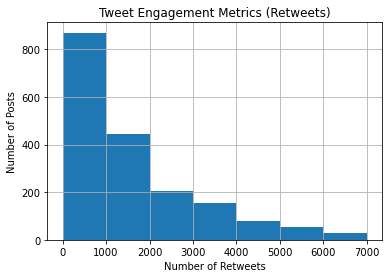

In [95]:
# examine the central 90% of data to determine trends between retweets
bins90 = range(int(round(tweets_act.retweet_count.quantile(0.05), -3)), int(round(tweets_act.retweet_count.quantile(0.95),-3)), 1000)
tweets_act.loc[:,'retweet_count'].hist(bins=bins90);
plt.title('Tweet Engagement Metrics (Retweets)');
plt.xlabel('Number of Retweets');
plt.ylabel('Number of Posts');

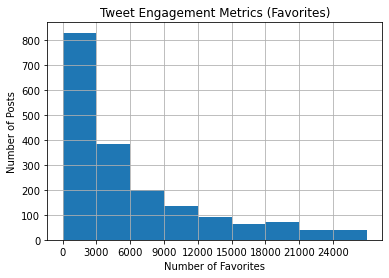

In [96]:
# examine the central 90% of data to determine trends between favorites
bins90 = range(int(round(tweets_act.favorite_count.quantile(0.05), -3)), int(round(tweets_act.favorite_count.quantile(0.95),-3)), 3000)
tweets_act.loc[:,'favorite_count'].hist(bins = bins90);
# set specific ticks on the x axis for better readability
plt.xticks(range(0,27000,3000));
plt.title('Tweet Engagement Metrics (Favorites)');
plt.xlabel('Number of Favorites');
plt.ylabel('Number of Posts');

In [97]:
# compare summary statistics retweets and favorites
tweets_act[['retweet_count','favorite_count']].describe().astype(int)

,retweet_count,favorite_count
count,1963,1963
mean,2412,8167
std,4310,12011
min,11,70
25%,538,1749
50%,1167,3684
75%,2758,10199
max,75806,153077


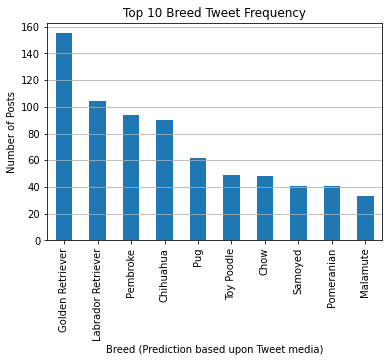

In [98]:
# plot a bar chart of the tweet frequency of the 10 most popular breeds according to the prediction data
tweets_act.breed_predict.value_counts().nlargest(10).plot.bar();
plt.grid(axis='y');
plt.title('Top 10 Breed Tweet Frequency');
plt.xlabel('Breed (Prediction based upon Tweet media)');
plt.ylabel('Number of Posts');

In [99]:
# gather the total count of breeds predictions in the entire dataset
tweets_act.breed_predict.nunique()

113

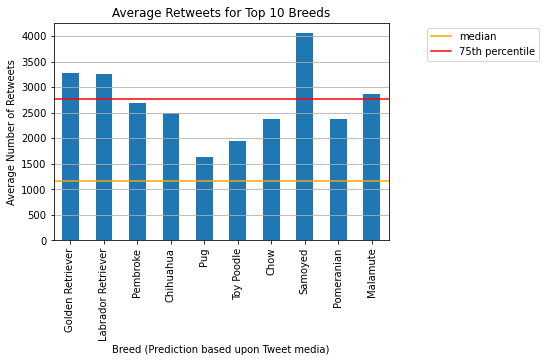

In [100]:
# construct a bar chart of the top 10 breeds' average number of retweets
top10breeds = tweets_act.breed_predict.value_counts()[:10].index.tolist()
tweets_act.groupby('breed_predict').mean().retweet_count[top10breeds].plot.bar();
plt.grid(axis='y');
plt.title('Average Retweets for Top 10 Breeds');
plt.xlabel('Breed (Prediction based upon Tweet media)');
# include a marker at the median retweet count for the entire dataset
plt.axhline(tweets_act['retweet_count'].median(), color = 'orange', label = 'median');
# include a marker at the 75th percentile retweet count for the entire dataset
plt.axhline(tweets_act['retweet_count'].quantile(0.75), color = 'r', label = '75th percentile');
plt.legend(labels = ['median','75th percentile'], bbox_to_anchor = (1.1, 1));
plt.ylabel('Average Number of Retweets');

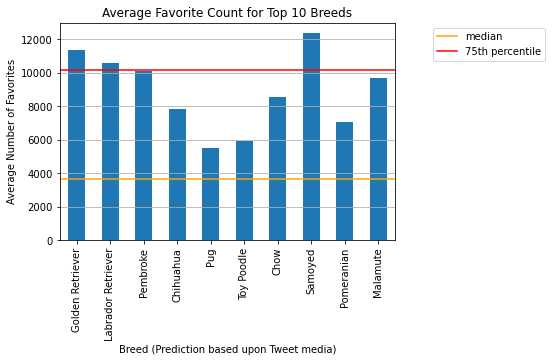

In [101]:
# construct a bar chart of the top 10 breeds' average number of favorites
tweets_act.groupby('breed_predict').mean().favorite_count[top10breeds].plot.bar();
plt.grid(axis='y');
plt.title('Average Favorite Count for Top 10 Breeds');
plt.xlabel('Breed (Prediction based upon Tweet media)');
# include a marker at the median favorite count for the entire dataset
plt.axhline(tweets_act['favorite_count'].median(), color = 'orange');
# include a marker at the 75th percentile favorite count for the entire dataset
plt.axhline(tweets_act['favorite_count'].quantile(0.75), color = 'r');
plt.legend(labels = ['median','75th percentile'], bbox_to_anchor = (1.1, 1));
plt.ylabel('Average Number of Favorites');

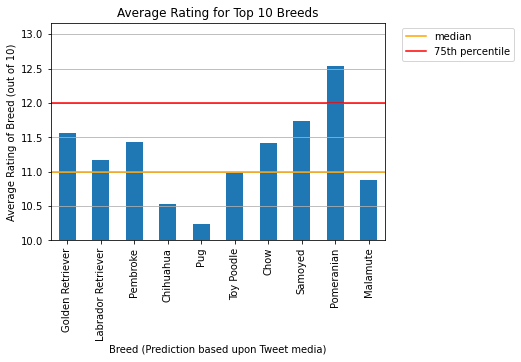

In [104]:
# construct a bar chart of the top 10 breeds' average rating by We Rate Dogs
tweets_act.groupby('breed_predict').mean().avg_rating[top10breeds].plot.bar();
plt.grid(axis='y');
plt.title('Average Rating for Top 10 Breeds');
plt.ylim(bottom=10);
plt.xlabel('Breed (Prediction based upon Tweet media)');
plt.ylabel('Average Rating of Breed (out of 10)');
# include a marker at the median rating value for the entire dataset
plt.axhline(tweets_act['avg_rating'].median(), color = 'orange');
# include a marker at the 75th percentile rating value for the entire dataset
plt.axhline(tweets_act['avg_rating'].quantile(0.75), color = 'r');
plt.legend(labels = ['median','75th percentile'], bbox_to_anchor = (1.4, 1));

In [103]:
# investigate what proportion of the We Rate Dog tweets are from the top 10 most tweeted breeds
tweets_act[tweets_act.breed_predict.isin(top10breeds)].shape[0]/tweets_act.shape[0]

0.3652572592969944